# AVHRR GAC Reader Introduction

Satpy uses __[pygac](https://pygac.readthedocs.io)__   to read and calibrate AVHRR GAC (Global Area Coverage) data. A reader for LAC (Local Area Coverage) data is under development. Check out https://github.com/pytroll/pygac/pull/5 if you are interested in contributing to the project.

Further Reading: https://www.avl.class.noaa.gov/release/data_available/avhrr/index.htm

## Supported Files

AVHRR data in NOAA GAC format. Example filename: `NSS.GHRR.NP.D15361.S0121.E0315.B3547172.SV`

## Quickstart with AVHRR GAC data from NOAA-14

In [ ]:
from datetime import datetime
from satpy.scene import Scene

scn = Scene(sensor="avhrr-2",
            start_time=datetime(1995, 2, 24, 9, 40),
            end_time=datetime(1995, 2, 24, 9, 42),
            base_dir='/home/a001673/usr/src/cci_geolocation/data',
            reader="avhrr_l1b_gaclac",
            reader_kwargs={'tle_dir': '/path/to/tle/',
                           'tle_name': 'TLE_%(satname)s.txt'})

In [ ]:
composite = 'overview'
scn.load([composite])
scn.show(composite)

<img src="gac_overview.jpg" />

Note that you have to specify location and format of the so called Two-Line-Elements (TLE) via `reader_kwargs`. Some NOAA-16 TLEs are available in [pygac's github repository](https://github.com/pytroll/pygac/tree/main/gapfilled_tles). Historical TLEs can be obtained from https://www.celestrak.com/ and have the following format:

```
1 23455U 94089A   01122.93455091  .00000622  00000-0  36103-3 0  7210
2 23455  99.1771 113.3063 0008405 277.6106  82.4106 14.12671703326608
1 23455U 94089A   01326.97611660  .00000739  00000-0  42245-3 0  9806
2 23455  99.1886 322.4670 0009980  66.2863 293.9354 14.12871991355419
etc
```

For more keyword arguments checkout out the [reader documentation](https://satpy.readthedocs.io/en/latest/api/satpy.readers.html#module-satpy.readers.avhrr_l1b_gaclac).

## Reading Individual Datasets

Of course you can also readout the individual channels and ancillary datasets directly. Here is an example with NOAA-19 data:

In [1]:
%matplotlib inline

In [ ]:
import satpy

# Channel set for KLM satellites. For POD satellites the channels are
# ['1', '2', '3', '4', '5'].
channels = ['1', '2', '3a', '3b', '4', '5']

# Select some ancillary datasets (there are more datasets available, 
# see satpy/etc/readers/avhrr_l1b_gaclac.yaml)
ancillary = ['solar_zenith_angle',
             'sensor_zenith_angle',
             'latitude',
             'longitude'] 

scene = satpy.Scene(filenames=['NSS.GHRR.NP.D15361.S0121.E0315.B3547172.SV'], 
                    reader='avhrr_l1b_gaclac', 
                    reader_kwargs={'tle_dir': 'tle/',
                                   'tle_name': 'TLE_%(satname)s.txt'})
scene.load(channels + ancillary)

In [3]:
scene['4']

<xarray.DataArray 'array-d416e9b022847a2d5f370401d47356d7' (y: 13760, x: 409)>
dask.array<array, shape=(13760, 409), dtype=float64, chunksize=(13760, 409)>
Coordinates:
    acq_time  (y) datetime64[ns] 2015-12-27T01:21:08.285000 ... 2015-12-27T03:15:47.785000
Dimensions without coordinates: y, x
Attributes:
    orbital_parameters:   {'tle': ('1 33591U 09005A   15360.91031674  .000001...
    platform_name:        noaa19
    orbit_number:         35471
    file_type:            gac_lac_l1b
    calibration:          brightness_temperature
    wavelength:           (10.3, 10.8, 11.3)
    name:                 4
    standard_name:        toa_brightness_temperature
    coordinates:          ('longitude', 'latitude')
    polarization:         None
    modifiers:            ()
    units:                K
    level:                None
    midnight_scanline:    None
    resolution:           1050
    sensor:               avhrr-3
    missing_scanlines:    [    1     2     3     4     5     6     7     8   ...
    start_time:           2015-12-27 01:21:08.285000
    end_time:             2015-12-27 03:15:47.785000
    area:                 Shape: (13760, 409)\nLons: <xarray.DataArray 'array...
    ancillary_variables:  []

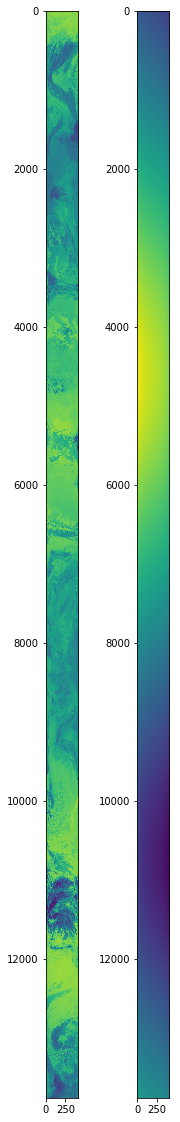

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(3, 20))
ax1.imshow(scene['4'])
ax2.imshow(scene['solar_zenith_angle'])
plt.show()